<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Frameworks/Pytorch/CNNs/Visualizing%20CNNs/Feature%20Visualization/FV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
img_path = 'http://enthusiastnetwork.s3.amazonaws.com/uploads/sites/5/2015/05/Google-self-driving-car-prototype-front-three-quarters.jpg?fit=around%7C875:492'

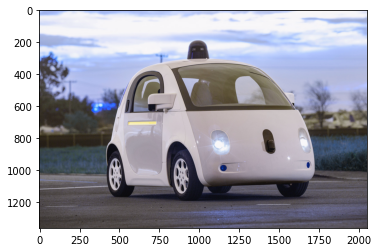

In [3]:
bgr_img = io.imread(img_path)
img_cvt=cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

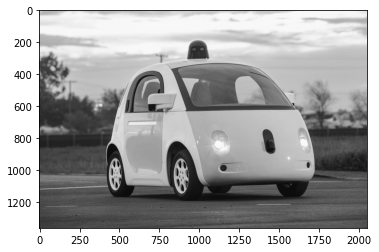

In [4]:
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [5]:
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [6]:
# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

In [7]:
filters = np.array([filter_1, filter_2, filter_3, filter_4])

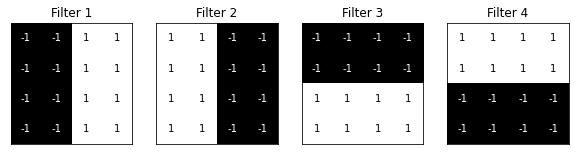

In [8]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [9]:
print(torch.from_numpy(filters).shape)
print(torch.from_numpy(filters).unsqueeze(1).shape)

torch.Size([4, 4, 4])
torch.Size([4, 1, 4, 4])


In [10]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
weight.shape

torch.Size([4, 1, 4, 4])

In [11]:
weight.shape[2:]

torch.Size([4, 4])

In [12]:
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(4, 4)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # applies pooling layer
        pooled_x = self.pool(activated_x)
        
        # returns all layers
        return conv_x, activated_x, pooled_x
    

model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


In [13]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

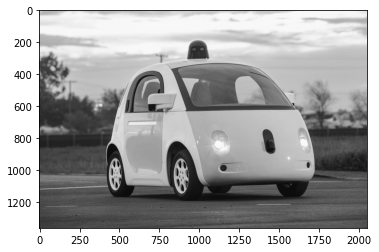

In [14]:
# plot original image
plt.imshow(gray_img, cmap='gray')

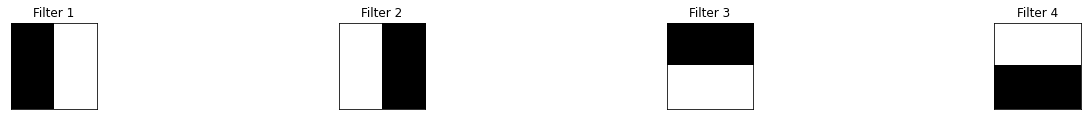

In [15]:
# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

In [16]:
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

In [17]:
# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

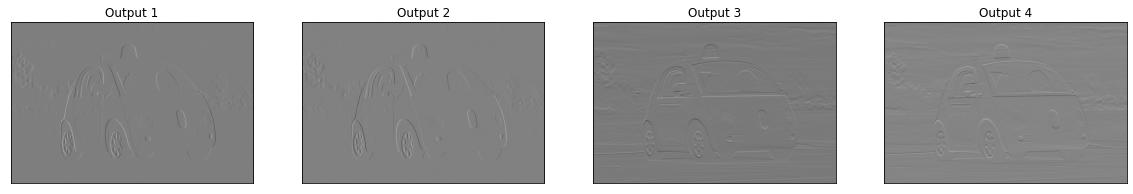

In [18]:
# visualize the output of a conv layer
viz_layer(conv_layer)

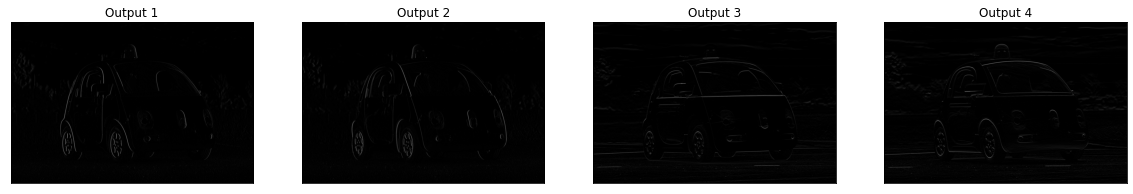

In [19]:
# visualize the output of the activated conv layer
viz_layer(activated_layer)

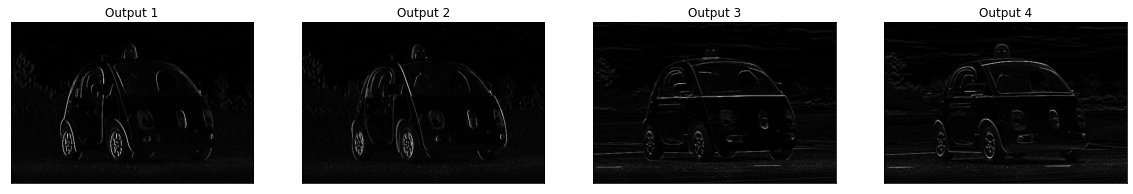

In [20]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)